# Classification algorithms on loan dataset

## Loan Data set

### Data preprocessing

In [30]:
#importing rquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
#importing data set
d= pd.read_csv('D:\\MBA RAJESH(D)\\MBA SEM 3\\GE 372 PREDICTIVE ANALYTICS\\python\\knn\\loan_data_set.csv')
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
#checking for missing values
d.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
#filling missing values with mode
d['Gender'] = d['Gender'].fillna(d['Gender'].mode().values[0])
d['Married'] = d['Married'].fillna(d['Married'].mode().values[0])
d['Dependents'] = d['Dependents'].fillna(d['Dependents'].mode().values[0])
d['Loan_Amount_Term'] = d['Loan_Amount_Term'].fillna(d['Loan_Amount_Term'].mode().values[0])
d['LoanAmount'] = d['LoanAmount'].fillna(d['LoanAmount'].mode().values[0])
d['Self_Employed'] = d['Self_Employed'].fillna(d['Self_Employed'].mode().values[0])
d['Credit_History'] = d['Credit_History'].fillna(d['Credit_History'].mode().values[0])

In [34]:
#checking for null values
d.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
#removing Loan_ID column
d.drop('Loan_ID',
         axis=1,
         inplace = True)
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### EDA

In [36]:
d.shape

(614, 12)

In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [38]:
#checking for duplicate values
d.duplicated().any()
#spent 2-3 hr on zomato data set to indentify duplicate values

False

<AxesSubplot:xlabel='Gender', ylabel='count'>

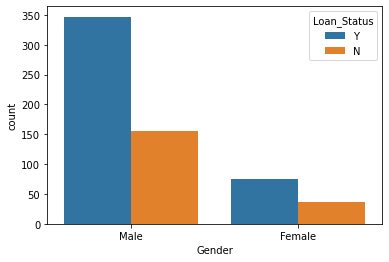

In [39]:
# checking impact of gender on loan status
sns.countplot(x='Gender',hue='Loan_Status',
             data= d)


<AxesSubplot:xlabel='Married', ylabel='count'>

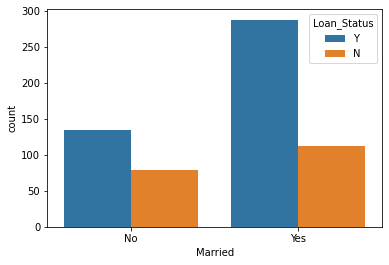

In [40]:
#checking effect of marital status on loan status
sns.countplot(x= 'Married',
              hue = 'Loan_Status',
              data = d)
#married persons have higher chances of getting loan approved, it is more in males

<AxesSubplot:xlabel='Education', ylabel='count'>

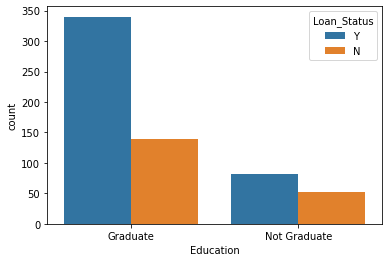

In [41]:
#effect of education on loan status
sns.countplot(x='Education',
              hue= 'Loan_Status',
              data = d)
#graduates have more chances of getting loan approved than ungraduates

C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

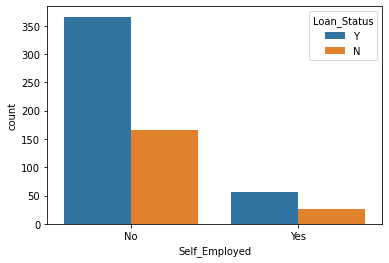

In [42]:
sns.countplot('Self_Employed',
              hue= 'Loan_Status',
              data = d)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

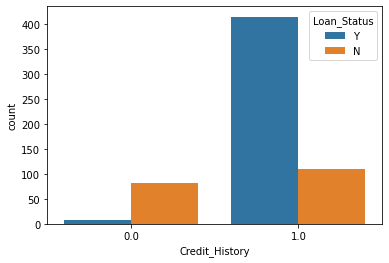

In [43]:
sns.countplot(x= 'Credit_History',
              hue = 'Loan_Status',
              data = d)
#people who have credit history have move chance of getting loan approved

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

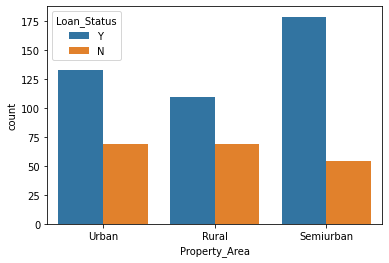

In [44]:
sns.countplot( x = 'Property_Area',
              hue = 'Loan_Status',
              data = d)
#property in semiurban is influencing loan approval

C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

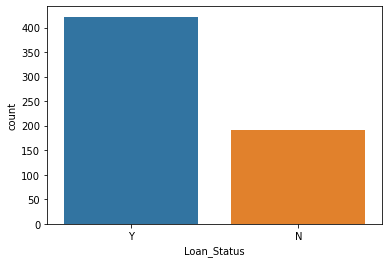

In [45]:
sns.countplot(d.Loan_Status)

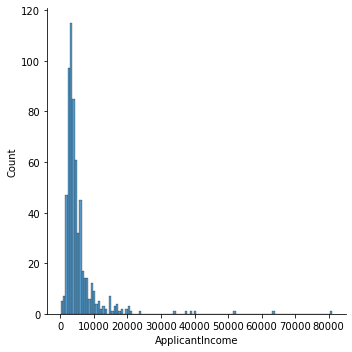

In [46]:
#applying distplot to income 
sns.displot(d.ApplicantIncome)

C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

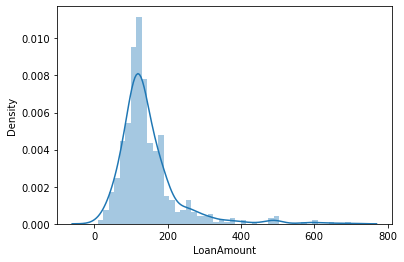

In [49]:
# plotting dist plot for loanAmount
sns.distplot(d['LoanAmount'])

you identified outliers but you didnt treat them! why?
Treat ouliers

In [51]:
#obtaining correlations
d.corr()
#loan Amount and ApplicantIncome have correlation of 0.57
#Loan Amount and CoapplicantIncome has correlation of 0.19

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


<AxesSubplot:>

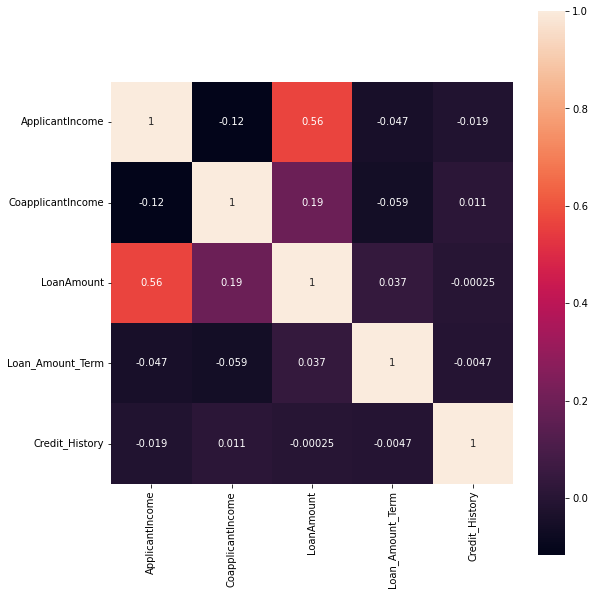

In [52]:
matrix = d.corr()
f, ax = plt.subplots(figsize=(9,10))
sns.heatmap(matrix, vmax=1, square = True, annot = True)
                     

#### Factor analysis


factor analysis is used to reduce no. of variables 

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#importing factor analyzer from factor_analyzer
from factor_analyzer import FactorAnalyzer

In [3]:
factor_data=pd.read_csv("D:\\MBA RAJESH(D)\\MBA SEM 3\\GE 331 HR ANALYTICS\\factor analysis\\wfb.csv")

In [4]:
#checking for null values
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             294 non-null    int64  
 1   Age                294 non-null    object 
 2   YourMaritalStatus  294 non-null    int64  
 3   EducationLevel     294 non-null    int64  
 4   JS1                294 non-null    float64
 5   JS2                294 non-null    float64
 6   JS3                294 non-null    float64
 7   FS1                294 non-null    float64
 8   FS2                294 non-null    float64
 9   FS3                294 non-null    float64
 10  LS1                294 non-null    float64
 11  LS2                294 non-null    float64
 12  LS3                294 non-null    float64
 13  LS4                294 non-null    float64
 14  LS5                294 non-null    float64
 15  WFB1               294 non-null    int64  
 16  WFB2               294 non

In [5]:
#checking for null values
factor_data.isnull().sum()

Gender               0
Age                  0
YourMaritalStatus    0
EducationLevel       0
JS1                  0
JS2                  0
JS3                  0
FS1                  0
FS2                  0
FS3                  0
LS1                  0
LS2                  0
LS3                  0
LS4                  0
LS5                  0
WFB1                 0
WFB2                 0
WFB3                 0
WFB4                 0
WFB5                 0
WFB                  0
JS                   0
FS                   0
LS                   0
dtype: int64

In [6]:
#checking for null values by value_counts
factor_data.value_counts().sum()
#found no null values

294

In [7]:
#removing unnecessary columns
factor_data.drop(['Gender','Age','YourMaritalStatus','EducationLevel','WFB', 'JS', 'FS', 'LS'],axis=1,inplace=True)

In [8]:
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JS1     294 non-null    float64
 1   JS2     294 non-null    float64
 2   JS3     294 non-null    float64
 3   FS1     294 non-null    float64
 4   FS2     294 non-null    float64
 5   FS3     294 non-null    float64
 6   LS1     294 non-null    float64
 7   LS2     294 non-null    float64
 8   LS3     294 non-null    float64
 9   LS4     294 non-null    float64
 10  LS5     294 non-null    float64
 11  WFB1    294 non-null    int64  
 12  WFB2    294 non-null    float64
 13  WFB3    294 non-null    int64  
 14  WFB4    294 non-null    int64  
 15  WFB5    294 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 36.9 KB


In [9]:
## adequecy test: bartlett sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(factor_data)
chi_square_value, p_value
## p_value is signigicant So, We will move further 
## what about chi_square_test???

(4792.341002580749, 0.0)

In [10]:
## adequecy test: KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(factor_data)
print(kmo_all) ###what does kmo_all indicate????????
kmo_model

[0.89453111 0.83820639 0.86891004 0.91531365 0.88491681 0.92464687
 0.95253166 0.931654   0.93628656 0.94009532 0.96178153 0.94520497
 0.94131258 0.93163278 0.90700618 0.93741025]


0.9229677636697246

In [11]:
#choosing no. of factors
fa=FactorAnalyzer(rotation=None)
fa.fit(factor_data)



FactorAnalyzer(rotation=None, rotation_kwargs={})

In [12]:
ev,v=fa.get_eigenvalues()

In [13]:
print(ev)

[8.5979936  2.21274597 1.72956832 0.82402834 0.49738067 0.35585746
 0.33592568 0.24966778 0.23113823 0.20962588 0.1852257  0.16741937
 0.13067744 0.10573692 0.10187034 0.06513829]


In [14]:
print(v)

[ 8.35460050e+00  1.99305200e+00  1.44833684e+00  4.81878995e-01
  9.05347582e-02  5.41162788e-02  3.11885965e-02  3.07471147e-03
 -1.33333301e-02 -3.24823783e-02 -4.51126248e-02 -7.27512363e-02
 -9.27143455e-02 -9.53128695e-02 -1.42881728e-01 -1.66204697e-01]


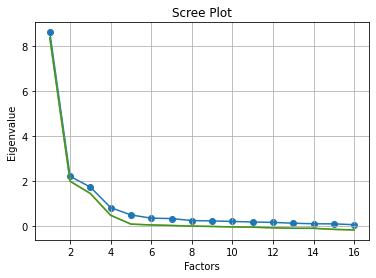

In [15]:
# Create scree plot using matplotlib
plt.scatter(range(1,factor_data.shape[1]+1),ev)
plt.plot(range(1,factor_data.shape[1]+1),ev)
plt.plot(range(1,factor_data.shape[1]+1),v)
plt.plot(range(1,factor_data.shape[1]+1),v)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
## ev and v values are similar

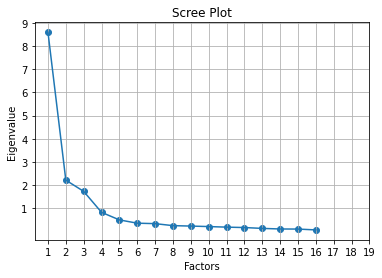

In [16]:
# Create scree plot using matplotlib
## chganing xticks and yticks
plt.scatter(range(1,factor_data.shape[1]+1),ev)
plt.plot(range(1,factor_data.shape[1]+1),ev)
plt.xticks(range(1,20))
plt.yticks(range(1,10))
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
## ev and v values are similar

from this scree plot, we can see no. of points above scree are 3
so no. of factors is equal to 3

In [17]:
#creating factor analyzer object with no. of factors and rotation method
fa1=FactorAnalyzer(n_factors=3,rotation='varimax')
##there are different rotation method choose appropriate one

In [18]:
#fitting data to object
fa1.fit(factor_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [19]:
#getting loadings
fa1.loadings_
##loadings indicates correlation between factors and observed variables
load=pd.DataFrame(fa1.loadings_,
                  index=factor_data.columns)

In [20]:
fa1.loadings_

array([[0.26660071, 0.19669825, 0.80190187],
       [0.21539635, 0.10824289, 0.80658594],
       [0.15225412, 0.0991065 , 0.76576976],
       [0.8125895 , 0.2701564 , 0.07092251],
       [0.86155217, 0.26730112, 0.07106182],
       [0.8608649 , 0.30288259, 0.06162216],
       [0.78319046, 0.25884909, 0.32668266],
       [0.77877741, 0.22837782, 0.23820994],
       [0.76515392, 0.22254563, 0.32459007],
       [0.63951216, 0.19143755, 0.2820758 ],
       [0.56072562, 0.2012076 , 0.21685727],
       [0.31506662, 0.84265977, 0.17351772],
       [0.28989333, 0.85039854, 0.15041573],
       [0.26729219, 0.84525059, 0.10680712],
       [0.26586164, 0.91028787, 0.12812115],
       [0.23909193, 0.83559528, 0.11704183]])

In [21]:
##plotting heatmap to understand loadings
import seaborn as sb

<AxesSubplot:>

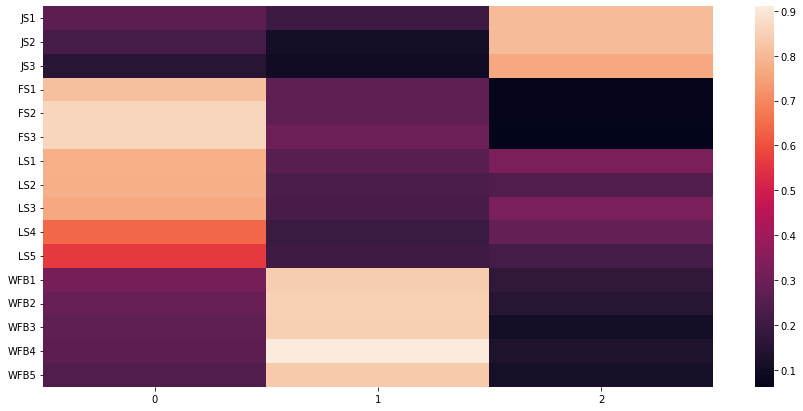

In [22]:
plt.figure(figsize=(15,7))
sb.heatmap(load)
##from this heatmap, one can understand that each factor capturing essence
## of observed variables

In [23]:
print(pd.DataFrame(fa1.get_factor_variance(),
                   index=['Variance','Propotinal variance','Cummulative variance'],
                  columns=['factor1','factor2','factor3']))
                
## what to infer from variance and propotinal variance

                       factor1   factor2   factor3
Variance              5.195644  4.216765  2.383581
Propotinal variance   0.324728  0.263548  0.148974
Cummulative variance  0.324728  0.588276  0.737249


In [24]:
print(pd.DataFrame(fa1.get_communalities(),
                index=[factor_data.columns],
                 columns=['Communalities']))
##INFERENCE
## FOR eg 66% of 'JS1' variation is explained by all factors

      Communalities
JS1        0.752813
JS2        0.708693
JS3        0.619407
FS1        0.738316
FS2        0.818772
FS3        0.836624
LS1        0.787112
LS2        0.715395
LS3        0.740346
LS4        0.525191
LS5        0.401925
WFB1       0.839451
WFB2       0.829841
WFB3       0.797301
WFB4       0.915721
WFB5       0.769083


In [25]:
pd.options.display.max_rows =40 

In [26]:
factor_score=fa1.transform(factor_data)
factor_score
## what is this factor_score??????????

array([[-9.51705603e-02, -1.81616252e+00, -7.35808143e-01],
       [ 6.78766674e-01, -1.53127507e+00,  7.09897821e-01],
       [-4.89204763e-01,  4.32484525e-01,  5.32331480e-01],
       [ 5.20492168e-02,  7.03012020e-01,  9.85733322e-01],
       [-8.11928346e-01,  3.24398992e-01,  1.37642075e+00],
       [ 3.11446652e-01,  8.47397627e-01, -9.18966205e-01],
       [-1.29653241e+00, -1.44001796e+00,  1.28508403e+00],
       [ 3.29718776e-01, -2.98769634e-01,  1.18502573e-01],
       [-7.95398625e-02, -3.03817142e-01,  9.59199013e-01],
       [-7.54731821e-02, -9.13420067e-01,  1.90306159e-01],
       [ 1.12922517e-01,  7.30196867e-01, -4.92087501e-01],
       [-1.85878324e+00, -8.64471007e-01,  1.57088475e+00],
       [ 4.37237137e-01,  9.07497273e-02, -5.98322175e-01],
       [ 5.03343215e-02,  8.02464103e-01,  2.62541361e-01],
       [-1.18204030e-01,  7.91401789e-01,  2.23627290e-03],
       [-7.81907695e-01,  8.38898860e-01,  4.44614419e-01],
       [-2.03550862e-01,  2.07818381e-01

In [27]:
#combining columns based on factor analysis
new_JS=factor_data[['JS1','JS2','JS3']]
new_FS_LS=factor_data[['FS1','FS2','FS3','LS1','LS2','LS3','LS4','LS5']]
new_wfb=factor_data[['WFB1','WFB2','WFB3','WFB4','WFB5']]


In [80]:
new_JS,new_FS_LS,new_wfb

(     JS1  JS2  JS3
 0    3.0  6.0  6.0
 1    7.0  6.0  7.0
 2    6.0  6.0  7.0
 3    7.0  7.0  7.0
 4    7.0  7.0  7.0
 ..   ...  ...  ...
 289  6.0  6.0  6.0
 290  6.0  6.0  6.0
 291  5.0  5.0  6.0
 292  5.0  6.0  5.0
 293  6.0  6.0  6.0
 
 [294 rows x 3 columns],
      FS1  FS2  FS3  LS1  LS2  LS3  LS4  LS5
 0    5.0  5.0  5.0  5.0  5.0  5.0  3.0  2.0
 1    7.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 2    5.0  5.0  5.0  5.0  6.0  6.0  7.0  4.0
 3    6.0  6.0  6.0  7.0  6.0  6.0  6.0  5.0
 4    4.0  4.0  5.0  6.0  6.0  6.0  7.0  1.0
 ..   ...  ...  ...  ...  ...  ...  ...  ...
 289  7.0  7.0  7.0  7.0  7.0  7.0  7.0  4.0
 290  7.0  7.0  7.0  6.0  7.0  5.0  5.0  5.0
 291  4.0  4.0  4.0  4.0  5.0  4.0  6.0  3.0
 292  7.0  7.0  7.0  6.0  7.0  6.0  6.0  7.0
 293  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 
 [294 rows x 8 columns],
      WFB1  WFB2  WFB3  WFB4  WFB5
 0       2   2.0     2     2   1.0
 1       3   3.0     6     2   2.0
 2       5   5.0     4     6   6.0
 3       6   6.0     6    

In [81]:
import pingouin as pn

In [82]:
#calculating cronbach alpha
JS_alpha = pn.cronbach_alpha(new_JS)
FS_alpha = pn.cronbach_alpha(new_FS_LS)
#LS_alpha = pn.cronbach_alpha(LS)
WFB_alpha = pn.cronbach_alpha(new_wfb)

In [83]:
print(JS_alpha,FS_alpha,WFB_alpha)

(0.8758467432350358, array([0.849, 0.899])) (0.9382920238175744, array([0.927, 0.948])) (0.9575117942133162, array([0.949, 0.965]))


after calulating cronbach alpha what should we do.........???? ask.....

                                                end

### model building

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [85]:
#converting some object data type to int
gender = {"Female":0, "Male":1}
yes_no = {"No" : 0, "Yes" :1}
dependents = {"0":0,"1" :1 , "2":2, "3+":3}
education = {"Not Graduate": 0, "Graduate":1}
property = {"Semiurban":0, "Urban" :1, "Rural" :2}
output={"N":0, "Y" : 1}

In [86]:
d['Gender'] = d['Gender'].replace(gender)
d['Married'] = d['Married'].replace(yes_no)
d['Dependents'] = d['Dependents'].replace(dependents)
d['Education'] = d['Education'].replace(education)
d['Property_Area'] = d['Property_Area'].replace(property)
d['Loan_Status'] = d['Loan_Status'].replace(output)

In [87]:
d['Self_Employed'] = d['Self_Employed'].replace(yes_no)


In [88]:
d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [89]:
x=d.drop('Loan_Status', axis=1)
y=d.Loan_Status


In [90]:
#splitting
x_train, x_test, y_trian, y_test = train_test_split(x, y, test_size=0.25,random_state = 38, stratify = y)

In [91]:
#implementing knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_trian)

KNeighborsClassifier()

In [92]:
prediction_knn = knn.predict(x_test)

In [93]:
prediction_knn

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [94]:
print('score for training set: {:.2f}'.format(knn.score(x_train,y_trian)))

score for training set: 0.74


In [95]:
print('score for test data set: {:.2f}'.format(knn.score(x_test,y_test)))

score for test data set: 0.66


In [96]:
print('accuracy of model : {:.2f}'.format(accuracy_score(y_test,prediction_knn)))

#interchanging of y_test and predictions_knn doesnt impact accuracy_score

accuracy of model : 0.66


In [97]:
#creating dataframe 
diff_knn = pd.DataFrame({'Actual Value':y_test,
                        'Predicted value' :prediction_knn})
diff_knn

,Actual Value,Predicted value
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0
...,...,...
352,1,1
238,1,1
248,1,0
104,1,1


[[ 9 39]
 [13 93]]


Text(33.0, 0.5, 'True')

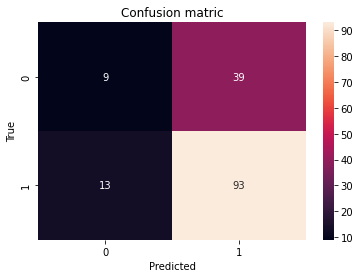

In [98]:
#confusion matrix and classification report
#from sklearn.metrics import metrics
from sklearn.metrics import classification_report, confusion_matrix
con_mat = confusion_matrix(y_test,prediction_knn)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion matric")
plt.xlabel("Predicted")
plt.ylabel("True")

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


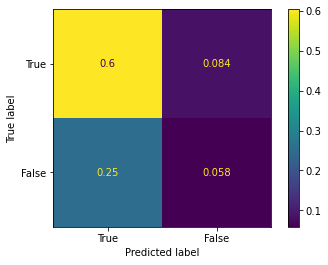

In [100]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction_knn,
                                        normalize='all',
                                       labels=(True,False))


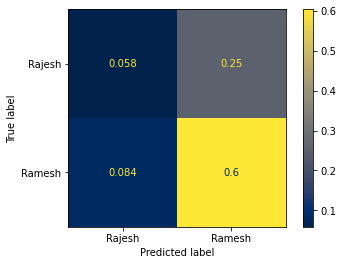

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction_knn,
                                        normalize='all',
                                       display_labels=('Rajesh','Ramesh'),
                                      cmap='cividis',
                                       colorbar=True
                                       )



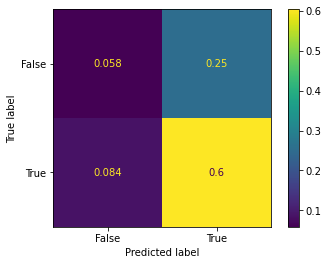

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction_knn,
                                        normalize='all',
                                       labels=(False,True))


In [103]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.41      0.19      0.26        48
           1       0.70      0.88      0.78       106

    accuracy                           0.66       154
   macro avg       0.56      0.53      0.52       154
weighted avg       0.61      0.66      0.62       154



decision tree

In [104]:
dTree = tree.DecisionTreeClassifier()
dTree.fit(x_train, y_trian)

DecisionTreeClassifier()

In [105]:
predction_dt = dTree.predict(x_test)
print("prediction for test set : {}".format(predction_dt))

prediction for test set : [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1]


In [106]:
print('score for training set: {:.2f}'.format(dTree.score(x_train,y_trian)))

score for training set: 1.00


In [107]:
print('score for testing set: {:.2f}'.format(dTree.score(x_test,y_test)))

score for testing set: 0.65


In [108]:
print('score for Accuracy of model : {:.2f}'.format(accuracy_score(predction_dt,y_test)))

score for Accuracy of model : 0.65


#### building knn on your own on loan data set 21-09-2022


In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
obj=KNeighborsClassifier(n_neighbors=3)

In [111]:
obj.fit(x_train,y_trian)

KNeighborsClassifier(n_neighbors=3)

In [112]:
pred=obj.predict(x_test)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
obj.score(x_train,y_trian)

0.7782608695652173

In [115]:
obj.score(x_test,y_test)

0.6428571428571429

In [116]:
accuracy_score(y_test,pred)

0.6428571428571429

In [117]:
confusion_matrix(y_test,pred)

array([[15, 33],
       [22, 84]], dtype=int64)

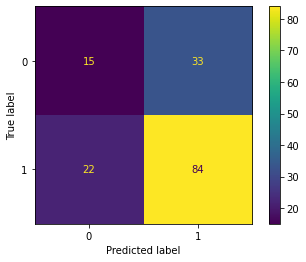

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [119]:
print(classification_report(y_test,pred))
#yoour data is imbalanced

              precision    recall  f1-score   support

           0       0.41      0.31      0.35        48
           1       0.72      0.79      0.75       106

    accuracy                           0.64       154
   macro avg       0.56      0.55      0.55       154
weighted avg       0.62      0.64      0.63       154



In [120]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.41      0.19      0.26        48
           1       0.70      0.88      0.78       106

    accuracy                           0.66       154
   macro avg       0.56      0.53      0.52       154
weighted avg       0.61      0.66      0.62       154



In [121]:
import random

In [122]:
random.seed(2)

In [123]:
# learning about random state
import numpy as np 
from sklearn.model_selection import train_test_split

In [124]:
#splitting
xtrain, xtest, y1test, ytest = train_test_split(x, y, test_size=0.25,random_state = 3, stratify = y)

In [125]:
print(ytest)

510    0
224    1
460    1
541    0
298    0
      ..
585    0
549    1
457    0
376    1
96     1
Name: Loan_Status, Length: 154, dtype: int64


In [126]:
#splitting
xa, xb, yb, ya = train_test_split(x, y, test_size=0.25,random_state = 38 , stratify=y)

In [127]:
print(ya)

263    1
395    1
226    0
413    1
403    1
      ..
352    1
238    1
248    1
104    1
8      1
Name: Loan_Status, Length: 154, dtype: int64


In [128]:
# working on grid search cv
from sklearn.neighbors import KNeighborsClassifier

In [129]:
# importing grid search cv 
# this grid seach cv has high computational cost
# alternative to this is RandomisedsearchCV
from sklearn.model_selection import GridSearchCV

In [130]:
#creating knn object
g_knn=KNeighborsClassifier()

In [131]:
# creating grid search object with estimator and prameters
grid_search = GridSearchCV(g_knn,
                          {'n_neighbors':np.arange(1,10,1),
                          'weights':['Uniform','distance'],
                          'algorithm':['ball-tree','kd-tree','brute']})

In [132]:
#fitting data to gridsearch object
grid_search.fit(x_train,y_trian)
## why these many warnings??????????

C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 82, in _check_weights
    raise ValueError(
Val

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball-tree', 'kd-tree', 'brute'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['Uniform', 'distance']})

In [133]:
#getting to know best estimator
grid_search.best_estimator_


KNeighborsClassifier(algorithm='brute', n_neighbors=8, weights='distance')

In [134]:
#getting results of gridsearch
grid_search.cv_results_
## results are not understandable
## so create a df with these results

{'mean_fit_time': array([0.00140548, 0.00203614, 0.0006494 , 0.00220985, 0.00070195,
        0.00205688, 0.00054064, 0.00182962, 0.00051885, 0.00225773,
        0.00046272, 0.00231009, 0.00042953, 0.00225954, 0.00066385,
        0.00211811, 0.00051627, 0.00198369, 0.00062437, 0.00202975,
        0.00050993, 0.0022336 , 0.0006494 , 0.00183163, 0.00058637,
        0.00162821, 0.        , 0.00314345, 0.        , 0.00366783,
        0.00085106, 0.00233469, 0.00107017, 0.00242004, 0.00056605,
        0.00204763, 0.00058918, 0.00180464, 0.00045681, 0.00329533,
        0.00069666, 0.0004137 , 0.00193958, 0.        , 0.00312886,
        0.00243106, 0.        , 0.        , 0.        , 0.00323787,
        0.        , 0.00172915, 0.        , 0.        ]),
 'std_fit_time': array([1.01964720e-03, 5.11776094e-04, 3.63701190e-04, 4.50796145e-04,
        2.02061140e-04, 3.10636312e-04, 9.29649775e-05, 7.05200469e-04,
        2.83641380e-04, 3.87362022e-04, 2.16331638e-04, 5.22584210e-04,
        3.962

In [135]:
#creating df with gridsearch results
grid_results=pd.DataFrame(scores)
grid_results

## how to interpret these results
## why there are some nan values

NameError: name 'scores' is not defined

In [136]:
grid_mean_test_score=pd.DataFrame(scores['mean_test_score'])
grid_mean_test_score

NameError: name 'scores' is not defined

how to evaluate best_estimator , how does this work??
one way to evaluate a calssification model is confusion matrix and classification report...
how to integrate confusion matrix and classification report with grid search ????

In [137]:
# getting confusion matrix and classification report for best estimator
best_estimator_knn=KNeighborsClassifier(algorithm='brute',
                                       n_neighbors=7, weights='distance')


In [138]:
#fitting dat to above object
best_estimator_knn.fit(x_train,y_trian)

KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

In [139]:
best_estimator_knn_predictons=best_estimator_knn.predict(x_test)
best_estimator_knn_predictons

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [140]:
y_test

263    1
395    1
226    0
413    1
403    1
      ..
352    1
238    1
248    1
104    1
8      1
Name: Loan_Status, Length: 154, dtype: int64

In [141]:
#checking score
best_estimator_knn.score(x_test,best_estimator_knn_predictons)

1.0

In [142]:
# checking accuracy score
accuracy_score(x_test,best_estimator_knn_predictons)
## getting error??????

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [143]:
ConfusionMatrixDisplay.from_predictions(x_test,best_estimator_knn_predictons)

## getting error 
## work on it one more time

ValueError: Mix type of y not allowed, got types {'multiclass-multioutput', 'binary'}

#### Logistic Regression on loan data set 04-10-2022

loan data is preprocessed but not normalized 
***
try building logistic regression without normalization and with normalization
***

##### logistic Regression without normalization

In [144]:
# importing required libraries
from sklearn.linear_model import  LogisticRegression

In [145]:
#creating Logistic Regression object

logiR=LogisticRegression(random_state=0)

In [146]:
# fitting dat to created object
logiR.fit(x_train,y_trian)

LogisticRegression(random_state=0)

In [147]:
#getting predictions
logi_pred=logiR.predict(x_test)
logi_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [148]:
# getting probabilities of predictions
logiR.predict_proba(x_test)

array([[0.32267329, 0.67732671],
       [0.12013957, 0.87986043],
       [0.24616986, 0.75383014],
       [0.29995413, 0.70004587],
       [0.28311536, 0.71688464],
       [0.21481404, 0.78518596],
       [0.18734262, 0.81265738],
       [0.12269612, 0.87730388],
       [0.29769491, 0.70230509],
       [0.45118551, 0.54881449],
       [0.92413988, 0.07586012],
       [0.32279601, 0.67720399],
       [0.12117995, 0.87882005],
       [0.19927512, 0.80072488],
       [0.20733701, 0.79266299],
       [0.16546332, 0.83453668],
       [0.12109107, 0.87890893],
       [0.39817265, 0.60182735],
       [0.75805527, 0.24194473],
       [0.28326817, 0.71673183],
       [0.1856416 , 0.8143584 ],
       [0.13751336, 0.86248664],
       [0.16243004, 0.83756996],
       [0.2579048 , 0.7420952 ],
       [0.84369382, 0.15630618],
       [0.15751916, 0.84248084],
       [0.27532111, 0.72467889],
       [0.27345707, 0.72654293],
       [0.15407413, 0.84592587],
       [0.16449027, 0.83550973],
       [0.

In [149]:
# model score
logiR.score(x_test,y_test)

0.7792207792207793

In [150]:
#getting model score with actual Vs. predicted
logiR.score([y_test],logi_pred)
## not working /////?????

C:\Users\MBA-RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 154 features, but LogisticRegression is expecting 11 features as input.

In [151]:
#trying other way
(y_test==logi_pred).sum()
## out of 154, this model is able to predict 120 correctly

120

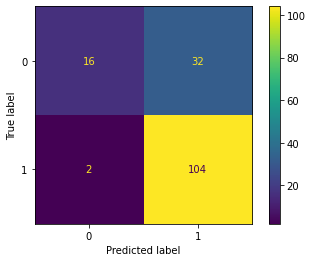

In [152]:
#further evaluating model with confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,logi_pred)
## 120 correct predictions is matching with classification matrix
## on calculating accuracy manually, You found that it is equal to "logiR.score(x_test,y_test)"
## 0-> not accepted, 1-> accepted

In [153]:
# getting classification Report
classification_report(y_test,logi_pred)
##results are not in readable form

'              precision    recall  f1-score   support\n\n           0       0.89      0.33      0.48        48\n           1       0.76      0.98      0.86       106\n\n    accuracy                           0.78       154\n   macro avg       0.83      0.66      0.67       154\nweighted avg       0.80      0.78      0.74       154\n'

In [154]:
#printing results for better readabilty
print(classification_report(y_test,logi_pred))
## logistic regression has accuracy of 78%
## k_nn has accuracy of 66%
## hence we can infer that logistic regression is better at classifying data than k_nn

              precision    recall  f1-score   support

           0       0.89      0.33      0.48        48
           1       0.76      0.98      0.86       106

    accuracy                           0.78       154
   macro avg       0.83      0.66      0.67       154
weighted avg       0.80      0.78      0.74       154



##### logistic regressiion with normalization

In [155]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler



In [156]:
#creatin minmax obj
logi_minmax_scaler=MinMaxScaler()

In [157]:
#normalising and dataframe conversion
x_nrom=pd.DataFrame(logi_minmax_scaler.fit_transform(x))
x_nrom

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.743590,1.0,0.5
1,1.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,1.0
2,1.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,0.5
3,1.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,0.5
4,1.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,1.0
610,1.0,1.0,1.000000,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,1.0
611,1.0,1.0,0.333333,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,0.5
612,1.0,1.0,0.666667,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,0.5


In [158]:
y
## y is normalised by default 
## so no need of further normalization

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [159]:
#checking for normalization
x_nrom.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.781759,0.133550,0.064978,0.038910,0.197490,0.706005,0.855049,0.456026
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.075560,0.070229,0.121825,0.137668,0.352339,0.407540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.045300,0.028524,0.167873,0.743590,1.000000,0.500000
75%,1.000000,1.000000,0.333333,1.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
#splitting data 
x_logi_train,x_logi_test,y_logi_train,y_logi_test=train_test_split(x_nrom,y, test_size=0.25,random_state = 38, stratify = y)

In [161]:
print(x_logi_train.shape,x_logi_test.shape,y_logi_train.shape,y_logi_test.shape)

(460, 11) (154, 11) (460,) (154,)


In [162]:
#creating logistict regression object
logiR_norm=LogisticRegression(random_state=0)

In [163]:
#fitting data to object
logiR_norm.fit(x_logi_train,y_logi_train)

LogisticRegression(random_state=0)

In [164]:
#making predictions
logiR_norm_pre=logiR_norm.predict(x_logi_test)
logiR_norm_pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [165]:
(logiR_norm_pre==y_logi_test).sum()

120

In [166]:
logiR_norm.score(x_logi_test,y_logi_test)

0.7792207792207793

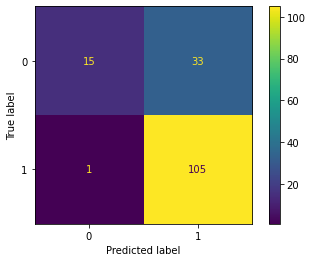

In [167]:
#getting confusion matrix
ConfusionMatrixDisplay.from_predictions(y_logi_test,logiR_norm_pre)

In [168]:
#getting classification report
print(classification_report(y_logi_test,logiR_norm_pre))

              precision    recall  f1-score   support

           0       0.94      0.31      0.47        48
           1       0.76      0.99      0.86       106

    accuracy                           0.78       154
   macro avg       0.85      0.65      0.66       154
weighted avg       0.82      0.78      0.74       154



In [169]:
#getting classification report without normalization
print(classification_report(y_test,logi_pred))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48        48
           1       0.76      0.98      0.86       106

    accuracy                           0.78       154
   macro avg       0.83      0.66      0.67       154
weighted avg       0.80      0.78      0.74       154



***
accuracy scores with normalization = 78%
accuracy scores without normalization = 78%
hence, accuracy is same with normalization and without normalization
but, with normalization precison scores are a bit better
***

#### Support Vector Machine on 04-10-2022

In [170]:
#importing svm
from sklearn.svm import SVC

In [171]:
#creating objet
svm_obj=SVC(random_state=0,verbose=True)

In [172]:
#fitting dat to svm obj
svm_obj.fit(x_logi_train,y_logi_train)

[LibSVM]

SVC(random_state=0, verbose=True)

In [173]:
#testing
svm_pred=svm_obj.predict(x_logi_test)
svm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [174]:
#checking model score (accuracy)
svm_obj.score(x_logi_test,y_logi_test)

0.7792207792207793

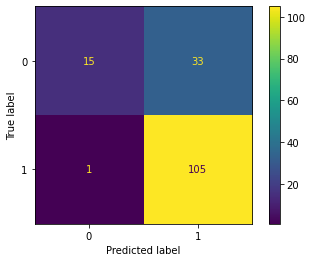

In [175]:
#getting confusion matrix
ConfusionMatrixDisplay.from_predictions(y_logi_test,svm_pred)

In [176]:
#getting classification report
print(classification_report(y_logi_test,svm_pred))
##svm is no better than logistic regression

              precision    recall  f1-score   support

           0       0.94      0.31      0.47        48
           1       0.76      0.99      0.86       106

    accuracy                           0.78       154
   macro avg       0.85      0.65      0.66       154
weighted avg       0.82      0.78      0.74       154



##### parameter tuning

In [177]:
#importing Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [178]:
#creating Gridsearchcv obj
svm_gridSearch=GridSearchCV(svm_obj,
                           {'C':np.arange(1,5,1),
                           'kernel':('linear', 'rbf'),
                           'gamma':['scale', 'auto',1,2,3],
                           })

In [179]:
#fitting data to svm_gridsearch
svm_gridSearch.fit(x_logi_train,y_logi_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(estimator=SVC(random_state=0, verbose=True),
             param_grid={'C': array([1, 2, 3, 4]),
                         'gamma': ['scale', 'auto', 1, 2, 3],
                         'kernel': ('linear', 'rbf')})

In [228]:
#getting results
svm_gridsearch_results=pd.DataFrame(data=svm_gridSearch.cv_results_)
svm_gridsearch_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006793,0.000709,0.002461,0.000506,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
1,0.010661,0.001021,0.002777,0.001599,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
2,0.006304,0.007721,0.000100,0.000201,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
3,0.008832,0.007382,0.004865,0.007119,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
4,0.008767,0.005659,0.003862,0.005876,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
5,0.005069,0.004296,0.007951,0.007412,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.826087,0.793478,0.826087,0.782609,0.847826,0.815217,0.023814,28
6,0.000000,0.000000,0.006251,0.007656,1,2,linear,"{'C': 1, 'gamma': 2, 'kernel': 'linear'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
7,0.007942,0.004128,0.002439,0.001343,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.793478,0.782609,0.826087,0.771739,0.847826,0.804348,0.028344,31
8,0.006257,0.007664,0.003119,0.006238,1,3,linear,"{'C': 1, 'gamma': 3, 'kernel': 'linear'}",0.836957,0.793478,0.836957,0.782609,0.847826,0.819565,0.026267,1
9,0.010060,0.007799,0.000589,0.001179,1,3,rbf,"{'C': 1, 'gamma': 3, 'kernel': 'rbf'}",0.760870,0.782609,0.804348,0.760870,0.836957,0.789130,0.028840,35


In [180]:
#getting best fit
svm_gridSearch.best_estimator_

SVC(C=1, kernel='linear', random_state=0, verbose=True)

##### optimum svm

In [181]:
#creating optimum svm obj
svm_opt_obj=SVC(C=1, kernel='linear', random_state=0, verbose=True)

In [182]:
#fittig data to it
svm_opt_obj.fit(x_logi_train,y_logi_train)

[LibSVM]

SVC(C=1, kernel='linear', random_state=0, verbose=True)

In [183]:
#getting predictions
svm_opt_pred=svm_opt_obj.predict(x_logi_test)
svm_opt_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [184]:
#checking accuracy score
svm_opt_obj.score(x_logi_test,y_logi_test)

0.7792207792207793

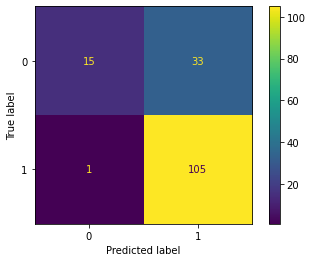

In [185]:
#getting confusion matrix
ConfusionMatrixDisplay.from_predictions(y_logi_test,svm_opt_pred)
##no imporovement

In [186]:
# getting classificatio report
print(classification_report(y_logi_test,svm_opt_pred))
## no impovement with parameter tuning

              precision    recall  f1-score   support

           0       0.94      0.31      0.47        48
           1       0.76      0.99      0.86       106

    accuracy                           0.78       154
   macro avg       0.85      0.65      0.66       154
weighted avg       0.82      0.78      0.74       154



#### Naive Baiyees on 06-10-2022

In [187]:
#importing Naive Bayees 
from sklearn.naive_bayes import GaussianNB

In [189]:
#creating naive bayes obj
nb_obj=GaussianNB()

In [190]:
#fitting data to obj
nb_obj.fit(x_logi_train,y_logi_train)

GaussianNB()

In [191]:
#checking score
nb_obj.score(x_logi_test,y_logi_test)

0.7857142857142857

In [193]:
#getting predictions
nb_pred=nb_obj.predict(x_logi_test)
nb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [195]:
#checking correct predictions using If
(nb_pred==y_logi_test).sum()

121

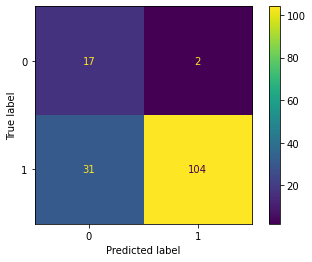

In [197]:
#getting confusion matrix
ConfusionMatrixDisplay.from_predictions(nb_pred,y_logi_test)
##seems this model is a bit better

In [203]:
# getting classification report
print(classification_report(nb_pred,y_logi_test))
## naive bayees has better accuracy score than previous models

              precision    recall  f1-score   support

           0       0.35      0.89      0.51        19
           1       0.98      0.77      0.86       135

    accuracy                           0.79       154
   macro avg       0.67      0.83      0.69       154
weighted avg       0.90      0.79      0.82       154



In [200]:
#getting other model reports for comparision
print(classification_report(svm_pred,y_logi_test))

              precision    recall  f1-score   support

           0       0.31      0.94      0.47        16
           1       0.99      0.76      0.86       138

    accuracy                           0.78       154
   macro avg       0.65      0.85      0.66       154
weighted avg       0.92      0.78      0.82       154



***
naive bayees has better accuracy score than previous models
***

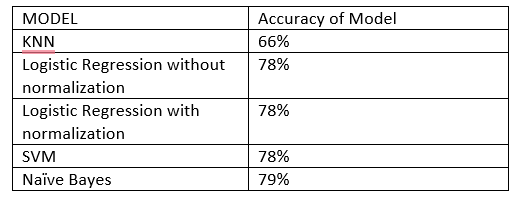